In [2]:
import pandas as pd

In [5]:
# 절대경로 불러오는 예시
df = pd.read_csv('C:/Users/jchoi02/Documents/dataset/Cross-Sectional Analysis - Sample data.csv')

In [6]:
# 상대경로를 불러오는 예시
df = pd.read_csv('Cross-Sectional Analysis - Sample data.csv')

In [16]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

## EDA

In [17]:
df

,Symbol,Company_Name,Country,Sector,Industry,F1,F2,F3,F4
0,BKS3RS,10x Genomics Inc Class A,United States,Health Care,Life Sciences Tools & Services,"5,365.9",0.1,0.0,NaN
1,BFMV9Y,"360 DigiTech, Inc. ADR Class A",China,Financials,Consumer Finance,"2,147.2",1.1,3.8,103.1
2,B1YW44,3i Group plc,United Kingdom,Financials,Capital Markets,"14,320.7",0.9,3.5,16.1
3,259570,3M Company,United States,Industrials,Industrial Conglomerates,"84,749.9",0.2,4.0,6.8
4,BY9D3L,"3SBio, Inc.",China,Health Care,Biotechnology,"1,746.6",1.1,3.5,5.2
...,...,...,...,...,...,...,...,...,...
2365,B544N7,Zoomlion Heavy Industry Science & Technology C...,China,Industrials,Machinery,"6,911.6",1.3,8.2,47.8
2366,B292RC,"ZOZO, Inc.",Japan,Consumer Discretionary,Internet & Direct Marketing Retail,"6,286.9",0.1,2.2,38.5
2367,BZ00V3,"Zscaler, Inc.",United States,Information Technology,Software,"18,071.6",0.0,0.0,NaN
2368,B04KP8,ZTE Corporation Class H,China,Information Technology,Communications Equipment,"15,444.2",0.5,2.3,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Symbol        2370 non-null   object 
 1   Company_Name  2370 non-null   object 
 2   Country       2370 non-null   object 
 3   Sector        2370 non-null   object 
 4   Industry      2370 non-null   object 
 5   F1            2369 non-null   float64
 6   F2            2366 non-null   float64
 7   F3            2366 non-null   float64
 8   F4            2083 non-null   object 
dtypes: float64(3), object(6)
memory usage: 166.8+ KB


In [13]:
df['Country'].unique()

array(['United States', 'China', 'United Kingdom', 'Denmark', 'Sweden',
       'Switzerland', 'Saudi Arabia', 'Netherlands', 'Philippines',
       'South Africa', 'United Arab Emirates', 'India', 'Ireland',
       'France', 'Taiwan', 'Spain', 'Norway', 'Germany', 'Thailand',
       'Japan', 'Belgium', 'Kuwait', 'Canada', 'Hong Kong', 'Turkey',
       'Mexico', 'Luxembourg', 'Brazil', 'Greece', 'South Korea',
       'Malaysia', 'Italy', 'Australia', 'Bermuda', 'Singapore',
       'New Zealand', 'Israel', 'Chile', 'Colombia', 'Poland', 'Qatar',
       'Czech Republic', 'Hungary', '@NA', 'Egypt', 'Peru', 'Portugal',
       'Finland', 'Austria', 'Uruguay', 'Indonesia', 'Macau'],
      dtype=object)

In [27]:
# 컬럼을 바꿀 규칙을 적는다. => 규칙을 함수로
def process_number(data):
    return float(data.replace(',', ''))

# 컬럼에 규칙을 적용한다. 
df['F1'] = df['F1'].astype(str) # 강제로 str으로 전체를 바꾼 후
df['F1'] = df['F1'].apply(process_number) # process_number 규칙을 적용한다.

In [32]:
df['F4'] = df['F4'].astype(str)
df['F4'] = df['F4'].apply(process_number)

In [28]:
df['F1']

0        5365.9
1        2147.2
2       14320.7
3       84749.9
4        1746.6
         ...   
2365     6911.6
2366     6286.9
2367    18071.6
2368    15444.2
2369    67148.0
Name: F1, Length: 2370, dtype: float64

In [33]:
help(df['F1'].rank)

Help on method rank in module pandas.core.generic:

rank(axis=0, method: 'str' = 'average', numeric_only: 'bool_t | None' = None, na_option: 'str' = 'keep', ascending: 'bool_t' = True, pct: 'bool_t' = False) -> 'FrameOrSeries' method of pandas.core.series.Series instance
    Compute numerical data ranks (1 through n) along axis.
    
    By default, equal values are assigned a rank that is the average of the
    ranks of those values.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Index to direct ranking.
    method : {'average', 'min', 'max', 'first', 'dense'}, default 'average'
        How to rank the group of records that have the same value (i.e. ties):
    
        * average: average rank of the group
        * min: lowest rank in the group
        * max: highest rank in the group
        * first: ranks assigned in order they appear in the array
        * dense: like 'min', but rank always increases by 1 between groups.
    
    num

In [38]:
df['F1_rank_desc'] = df['F1'].rank(ascending=False)
df['F1_rank_desc_pct'] = df['F1'].rank(ascending=False, pct=True)
groupby_result = (
    # df[df['Sector'] == 'Utilities'] # Sector가 Utilities인 유니버스 
    # df[df['F1'] >= 1000] # F1이 1000이상인 것.
    # df[df['F1_rank_desc'] <= len(df) * 0.2] # F1이 오름차순으로 정렬된 순위 (default는 해당 컬럼이 없었음) 에서 상위 20%인 것.
    df[df['F1_rank_desc_pct'] <= 0.2] # F1이 오름차순으로 정렬된 순위 (default는 해당 컬럼이 없었음) 에서 상위 20%인 것.
    .groupby(['Country'])
    ['F1'].sum()
    .to_frame()
)

In [41]:
result = groupby_result.rename({
    'F1': 'sum_of_F1_top_twenty_pct'
}, axis=1) # axis=0 => index, axis=1 => columns

In [44]:
result = result.reset_index() # index를 초기화 => index에 있던 데이터가 컬럼으로 이동.

In [45]:
result

,Country,sum_of_F1_top_twenty_pct
0,Australia,687521.1
1,Belgium,109204.6
2,Brazil,304272.8
3,Canada,1360610.2
4,China,2911198.9
...,...,...
26,Taiwan,550191.8
27,United Arab Emirates,134546.2
28,United Kingdom,1750786.3
29,United States,29985492.5


In [51]:
# 외생변수를 원래 데이터프레임에 추가할 것.
merged_result = pd.merge(df, result, on=['Country'], how='left') # inner, left, right, outer

In [60]:
import seaborn as SNS

<AxesSubplot:xlabel='F1', ylabel='Count'>

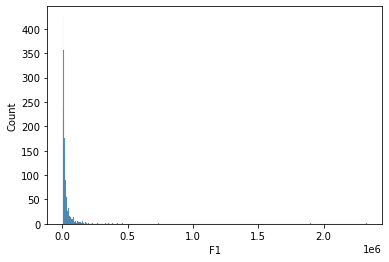

In [61]:
SNS.histplot(df, x='F1')

In [42]:
result # groupby의 기준 => index => 컬럼으로 바꿔주는 작업

,sum_of_F1_top_twenty_pct
Country,
Australia,687521.1
Belgium,109204.6
Brazil,304272.8
Canada,1360610.2
China,2911198.9
...,...
Taiwan,550191.8
United Arab Emirates,134546.2
United Kingdom,1750786.3


In [37]:
df[['F1_rank_desc', 'F1_rank_desc_pct']]

,F1_rank_desc,F1_rank_desc_pct
0,1901.0,0.802448
1,2318.0,0.978472
2,1061.0,0.447868
3,142.0,0.059941
4,2340.0,0.987759
...,...,...
2365,1705.0,0.719713
2366,1780.0,0.751372
2367,876.0,0.369776
2368,1002.0,0.422963


In [ ]:
# data['something'] # SELECT SOMETHING FROM DATA
# operation('something') # EXECUTE OPERATION USING SOMETHING

In [14]:
len(df['Country'].unique())

52

In [18]:
df['Sector'].unique()

array(['Health Care', 'Financials', 'Industrials', 'Real Estate',
       'Information Technology', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Materials',
       'Communication Services', 'Energy'], dtype=object)

In [19]:
len(df['Sector'].unique())

11

In [63]:
# Z-score = (x - mean) / std

In [86]:
df['F1_zscore'] = (df['F1'] - df['F1'].mean()) / df['F1'].std()

In [65]:
df[['F1_zscore']]

,F1_zscore
0,-0.260062
1,-0.292682
2,-0.169310
3,0.544455
4,-0.296742
...,...
2365,-0.244397
2366,-0.250728
2367,-0.131296
2368,-0.157924


In [75]:
df

,Symbol,Company_Name,Country,Sector,Industry,F1,F2,F3,F4,F1_rank_desc,F1_rank_desc_pct,F1_zscore
0,BKS3RS,10x Genomics Inc Class A,United States,Health Care,Life Sciences Tools & Services,5365.9,0.1,0.0,NaN,1901.0,0.802448,-0.260062
1,BFMV9Y,"360 DigiTech, Inc. ADR Class A",China,Financials,Consumer Finance,2147.2,1.1,3.8,103.1,2318.0,0.978472,-0.292682
2,B1YW44,3i Group plc,United Kingdom,Financials,Capital Markets,14320.7,0.9,3.5,16.1,1061.0,0.447868,-0.169310
3,259570,3M Company,United States,Industrials,Industrial Conglomerates,84749.9,0.2,4.0,6.8,142.0,0.059941,0.544455
4,BY9D3L,"3SBio, Inc.",China,Health Care,Biotechnology,1746.6,1.1,3.5,5.2,2340.0,0.987759,-0.296742
...,...,...,...,...,...,...,...,...,...,...,...,...
2365,B544N7,Zoomlion Heavy Industry Science & Technology C...,China,Industrials,Machinery,6911.6,1.3,8.2,47.8,1705.0,0.719713,-0.244397
2366,B292RC,"ZOZO, Inc.",Japan,Consumer Discretionary,Internet & Direct Marketing Retail,6286.9,0.1,2.2,38.5,1780.0,0.751372,-0.250728
2367,BZ00V3,"Zscaler, Inc.",United States,Information Technology,Software,18071.6,0.0,0.0,NaN,876.0,0.369776,-0.131296
2368,B04KP8,ZTE Corporation Class H,China,Information Technology,Communications Equipment,15444.2,0.5,2.3,NaN,1002.0,0.422963,-0.157924


In [76]:
country_groupby_mean = (
    df
    .groupby(['Country'])['F1']
    .mean()
    .to_frame()
    .rename({
        'F1': 'country_F1_mean'
    }, axis=1)
    .reset_index()
) # 외생 1. 평균 

country_groupby_std = (
    df
    .groupby(['Country'])['F1']
    .std()
    .to_frame()
    .rename({
        'F1': 'country_F1_std'
    }, axis=1)
    .reset_index()
) # 외생 2. 편차

merged_df = pd.merge(df, country_groupby_mean, on=['Country'], how='left') # mean 이 합쳐짐.
merged_df = pd.merge(merged_df, country_groupby_std, on=['Country'], how='left') # mean이 합쳐진 데이터프레임에 std를 추가.

merged_df['F1_Country_zscore'] = (merged_df['F1'] - merged_df['country_F1_mean']) / merged_df['country_F1_std']

In [77]:
merged_df

,Symbol,Company_Name,Country,Sector,Industry,F1,F2,F3,F4,F1_rank_desc,F1_rank_desc_pct,F1_zscore,country_F1_mean,country_F1_std,F1_Country_zscore
0,BKS3RS,10x Genomics Inc Class A,United States,Health Care,Life Sciences Tools & Services,5365.9,0.1,0.0,NaN,1901.0,0.802448,-0.260062,61388.587776,159700.838150,-0.350798
1,BFMV9Y,"360 DigiTech, Inc. ADR Class A",China,Financials,Consumer Finance,2147.2,1.1,3.8,103.1,2318.0,0.978472,-0.292682,25027.125146,49318.629691,-0.463921
2,B1YW44,3i Group plc,United Kingdom,Financials,Capital Markets,14320.7,0.9,3.5,16.1,1061.0,0.447868,-0.169310,29378.181609,41206.801636,-0.365413
3,259570,3M Company,United States,Industrials,Industrial Conglomerates,84749.9,0.2,4.0,6.8,142.0,0.059941,0.544455,61388.587776,159700.838150,0.146282
4,BY9D3L,"3SBio, Inc.",China,Health Care,Biotechnology,1746.6,1.1,3.5,5.2,2340.0,0.987759,-0.296742,25027.125146,49318.629691,-0.472043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,B544N7,Zoomlion Heavy Industry Science & Technology C...,China,Industrials,Machinery,6911.6,1.3,8.2,47.8,1705.0,0.719713,-0.244397,25027.125146,49318.629691,-0.367316
2366,B292RC,"ZOZO, Inc.",Japan,Consumer Discretionary,Internet & Direct Marketing Retail,6286.9,0.1,2.2,38.5,1780.0,0.751372,-0.250728,16451.618462,23030.741172,-0.441354
2367,BZ00V3,"Zscaler, Inc.",United States,Information Technology,Software,18071.6,0.0,0.0,NaN,876.0,0.369776,-0.131296,61388.587776,159700.838150,-0.271238
2368,B04KP8,ZTE Corporation Class H,China,Information Technology,Communications Equipment,15444.2,0.5,2.3,NaN,1002.0,0.422963,-0.157924,25027.125146,49318.629691,-0.194306


In [78]:
country_sector_groupby_mean = (
    df
    .groupby(['Country', 'Sector'])['F1']
    .mean()
    .to_frame()
    .rename({
        'F1': 'country_sector_F1_mean'
    }, axis=1)
    .reset_index()
) # 외생 1. 평균 

country_sector_groupby_std = (
    df
    .groupby(['Country', 'Sector'])['F1']
    .std()
    .to_frame()
    .rename({
        'F1': 'country_sector_F1_std'
    }, axis=1)
    .reset_index()
) # 외생 2. 편차

merged_df = pd.merge(df, country_sector_groupby_mean, on=['Country', 'Sector'], how='left') # mean 이 합쳐짐.
merged_df = pd.merge(merged_df, country_sector_groupby_std, on=['Country', 'Sector'], how='left') # mean이 합쳐진 데이터프레임에 std를 추가.

c['F1_Country_Sector_zscore'] = (merged_df['F1'] - merged_df['country_sector_F1_mean']) / merged_df['country_sector_F1_std']

In [81]:
merged_df[['F1_zscore', 'F1_Country_Sector_zscore', 'F1']].corr()

,F1_zscore,F1_Country_Sector_zscore,F1
F1_zscore,1.000000,0.502864,1.000000
F1_Country_Sector_zscore,0.502864,1.000000,0.502864
F1,1.000000,0.502864,1.000000


In [82]:
# Pivot Table

In [83]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data: 'DataFrame', values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an a

In [85]:
pd.pivot_table(df, index=['Country'], columns=['Sector'], values=['F1'], aggfunc='sum')

F1                         \
Sector               Communication Services Consumer Discretionary   
Country                                                              
@NA                                     NaN                    NaN   
Australia                           48415.6                75793.4   
Austria                                 NaN                    NaN   
Belgium                              5741.5                    NaN   
Bermuda                                 NaN                    NaN   
...                                     ...                    ...   
Turkey                               2650.6                 6156.2   
United Arab Emirates                75293.5                13919.0   
United Kingdom                     112171.7               122571.8   
United States                     3507212.3              3998226.2   
Uruguay                                 NaN                37748.2   

                                                                         \
Sector               Consumer Staples     Energy Financials Health Care   
Country                                                                   
@NA                               NaN        NaN        NaN         NaN   
Australia                     62388.2    52734.3   399578.0    127922.5   
Austria                           NaN    16978.2    17828.2         NaN   
Belgium                      113625.1        NaN    56399.5     18261.5   
Bermuda                           NaN        NaN    28270.4         NaN   
...                               ...        ...        ...         ...   
Turkey                         3134.2     3956.6     9921.9         NaN   
United Arab Emirates              NaN        NaN   119913.2         NaN   
United Kingdom               463604.1   317105.9   440175.8    334095.7   
United States               2576718.1  1598470.7  4110421.8   4986526.5   
Uruguay                           NaN        NaN        NaN         NaN   

                                                                               \
Sector               Industrials Information Technology Materials Real Estate   
Country                                                                         
@NA                          NaN                    NaN       NaN         0.0   
Australia                61655.8                19504.1  296590.7     74394.2   
Austria                      NaN                    NaN    4953.8         NaN   
Belgium                      NaN                    NaN   20274.0         NaN   
Bermuda                  15415.3                    NaN       NaN     10650.9   
...                          ...                    ...       ...         ...   
Turkey                   13167.1                    NaN    7028.1         NaN   
United Arab Emirates         NaN                    NaN       NaN     24333.7   
United Kingdom          211637.1                26227.7  396074.0     32786.9   
United States          2712154.4              9672459.7  809836.0   1132303.2   
Uruguay                      NaN                    NaN       NaN         NaN   

                                 
Sector                Utilities  
Country                          
@NA                         NaN  
Australia               18235.5  
Austria                 30130.7  
Belgium                 11135.3  
Bermuda                     NaN  
...                         ...  
Turkey                      NaN  
United Arab Emirates        NaN  
United Kingdom          99451.1  
United States         1053549.3  
Uruguay                     NaN  

[52 rows x 11 columns]